## 线性回归 

- 参数设置
    - X, 样本数据, shape=(m,n),type:np.ndarray()
    - y, 标签数据, shape=(m,1),type:np.ndarray()
    - theta, 权重, shape=(1,n),type:np.ndarray()
    - b, 偏差，标量, type:float

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### 预测函数
- 根据样本数据与权值向量得到预测变量
\begin{equation}
X=
\left[\begin{matrix}
x_{11} & x_{12} & \cdots & \cdots & x_{1n}\\
x_{21} & x_{22} & \cdots & \cdots & x_{2n}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{m1} & x_{m2} & \cdots & \cdots & x_{mn}\\
\end{matrix}
\right],
\theta=
\left[\begin{matrix}
\theta_{1} & \theta_{2} & \cdots & \cdots & \theta_{n}\\
\end{matrix}
\right]
\end{equation}
\begin{equation}
y = X \times \theta^{T}
\end{equation} 
\begin{equation}
\left[\begin{matrix}
x_{11} & x_{12} & \cdots & \cdots & x_{1n}\\
x_{21} & x_{22} & \cdots & \cdots & x_{2n}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{m1} & x_{m2} & \cdots & \cdots & x_{mn}\\
\end{matrix}
\right]
\left[\begin{matrix}
\theta_{1} \\
\theta_{2} \\
\cdots \\
\theta_{n}\\
\end{matrix}
\right]=
\left[\begin{matrix}
y_{1} \\
y_{2} \\
\cdots \\
y_{m}\\
\end{matrix}
\right]
\end{equation}

#### 梯度下降法逼近 $\theta$ 与 $b$  

In [121]:
class LinearRegression(object):
    def __init__(self, learning_rate = 0.1, epochs = 500, verbose=False):
        self.theta = None
        self.b = None
        self.alpha = learning_rate
        self.epochs = epochs
        self.verbose = verbose
    def train(self, train_x, train_y):
        if len(train_y.shape) == 1:
            train_y = train_y.reshape(-1, 1)
        m , n = train_x.shape
        self.theta = np.random.randn(1,n)
        self.b = np.random.randn()
        for i in xrange(self.epochs):
            pre_y = self.predict(train_x)
            d_theta = np.mean((pre_y - train_y)*train_x,axis=0)
            d_b    = np.mean(pre_y - train_y, axis=0)
            self.theta -= self.alpha * d_theta
            self.b     -= self.alpha * d_b
            if self.verbose is True and (i+1) % 100 == 0:
                print "the %d epoch, the W is %d and the b is %d" \
                % (i, self.theta, self.b)
    def fit(self, train_x, train_y):
        self.train(train_x, train_y)
    def predict(self, x):
        """
        type sita:([[]])
        type b:float
        type X:([[]])
        rtype:([[]])
        """
        pre = np.dot(x , self.theta.T) + self.b
        return pre

### 测试线性回归 

In [2]:
def load_data():
    diabetes = datasets.load_diabetes()
    # Use only one feature
    diabetes_X = diabetes.data[:, np.newaxis, 2]

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes.target[:-20]
    diabetes_y_test = diabetes.target[-20:]
    return diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test

In [123]:
def regression(train_x, train_y, test_x, test_y):
    lr = LinearRegression(learning_rate=0.01, epochs=100000, verbose=False)
    lr.train(train_x, train_y)
    pre_y = lr.predict(test_x)
    
    print('Coefficients: \n', lr.theta, lr.b)
    # The mean squared error
    print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pre_y))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(test_y, pre_y))
    
    plt.scatter(test_x, test_y, c = 'k', label='data')
    plt.plot(test_x, pre_y, c='g', label='prediction', linewidth=3)
    plt.legend()

In [8]:
def regression_sklearn(train_x, train_y, test_x, test_y):
    plt.style.use('dark_background')
    plt.figure(figsize=(16, 9))
    lr = linear_model.LinearRegression()
    lr.fit(train_x, train_y)
    pre_y = lr.predict(test_x)
    
    print('Coefficients: \n', lr.coef_, lr.intercept_)
    # The mean squared error
    print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pre_y))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(test_y, pre_y))
    
    plt.scatter(test_x, test_y, c = 'white', label='data')
    plt.plot(test_x, pre_y, c='g', label='prediction', linewidth=3)
    plt.legend() 

In [4]:
train_x, test_x, train_y, test_y = load_data()

('Coefficients: \n', array([[ 840.94753137]]), array([ 152.96497534]))
Mean squared error: 2679.63
Variance score: 0.45


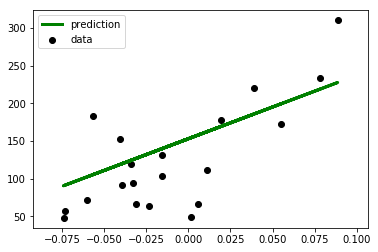

In [126]:
regression(train_x, train_y, test_x, test_y)

('Coefficients: \n', array([ 938.23786125]), 152.91886182616167)
Mean squared error: 2548.07
Variance score: 0.47


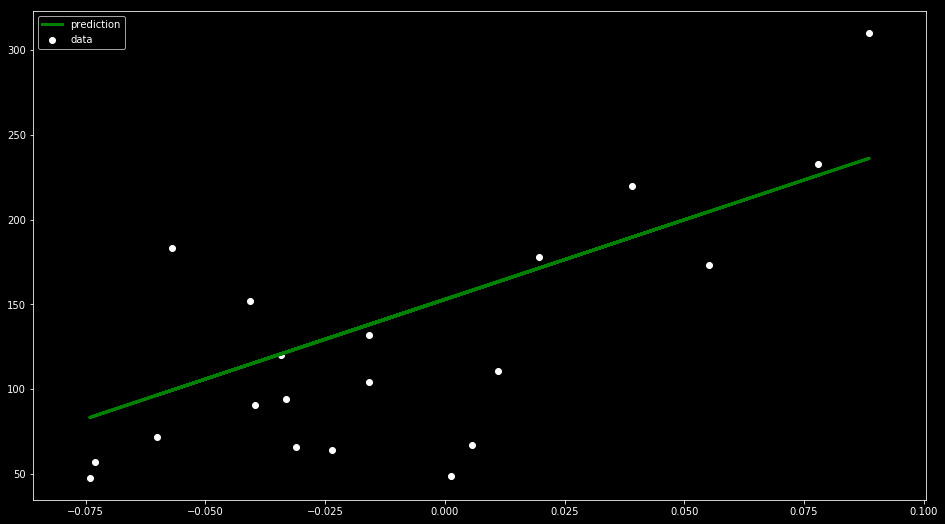

In [9]:
regression_sklearn(train_x, train_y, test_x, test_y)